In [1]:
using Colors
using Compose
using GraphPlot
using Graphs
using SimpleWeightedGraphs
using Plots

import Cairo, Fontconfig

Fontconfig warning: ignoring UTF-8: not a valid region tag


# Weighted Undirected Complete Graph ($G_W$)

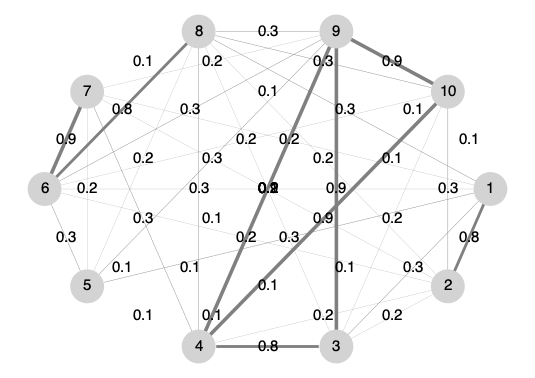

In [11]:
N = 10
gW = SimpleWeightedGraph(N)

for x in 1:N
    for y in 1:N
        if x < y
            if (x, y) ∈ [(1, 2), (3, 4), (6, 7), (6, 8), (3, 9), (4, 9), (4, 10), (9, 10)]
                add_edge!(gW, x, y, rand(0.8:0.1:0.9))
            else
                add_edge!(gW, x, y, rand(0.1:0.1:0.3))
            end
        end
    end
end

weight_vec = [round(get_weight(gW, e.src, e.dst), digits=2) for e in edges(gW)]

p = gplot(
    gW,
    layout=circular_layout,
    nodelabel=1:N,
    nodefillc=colorant"lightgray", 
    edgelabel=weight_vec,
    edgelinewidth=weight_vec.^2,
    edgestrokec=colorant"gray",
)
display(p)
draw(PNG("presentation1.png"), p)

# Undirected Unconnected Graph

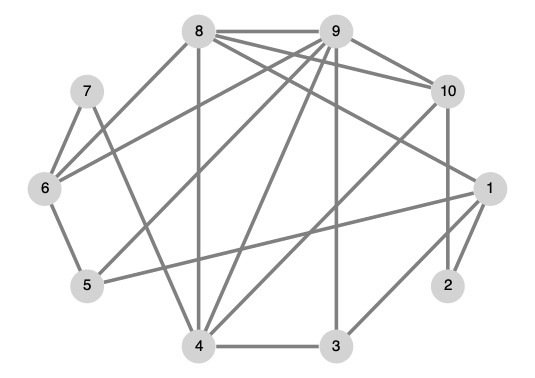

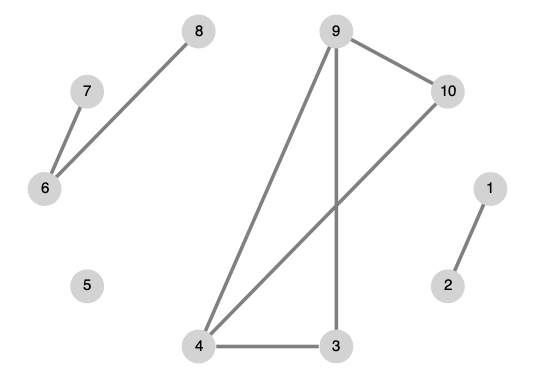

In [12]:
for (i, t) in enumerate([0.25, 0.75])
    gT = SimpleGraph(weights(gW) .> t)
    p = gplot(
        gT,
        layout=circular_layout,
        nodelabel=1:N,
        nodefillc=colorant"lightgray", 
        edgestrokec=colorant"gray",
    )
    display(p)
    draw(PNG("presentation$(i+1).png"), p)
end